In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_original = pd.read_csv("/content/drive/MyDrive/BTC.csv")

In [ ]:
df_original.head()

,Crypto,Date,Open,High,Low,Close
0,BTC,12/31/19,7254.0,7309.0,7132.0,7171.0
1,BTC,12/30/19,7402.0,7430.0,7217.0,7254.0
2,BTC,12/29/19,7334.0,7529.0,7295.0,7402.0
3,BTC,12/28/19,7235.0,7359.0,7235.0,7334.0
4,BTC,12/27/19,7208.0,7267.0,7087.0,7235.0


In [ ]:
# drop the BTC column because its the same value in all cells.
df = df_original.drop(["Crypto"], axis=1)

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,12/31/19,7254.0,7309.0,7132.0,7171.0
1,12/30/19,7402.0,7430.0,7217.0,7254.0
2,12/29/19,7334.0,7529.0,7295.0,7402.0
3,12/28/19,7235.0,7359.0,7235.0,7334.0
4,12/27/19,7208.0,7267.0,7087.0,7235.0


In [ ]:
# 1. Missing values: We dont have any missing value
missing_values = df.isnull().sum()
percentage = 100 * df.isnull().sum() / len(df)
missing_values_table = pd.concat([missing_values, percentage], axis=1)
missing_values_table.columns = ['Num. of missing values','% of missing values']
print(missing_values_table)

       Num. of missing values  % of missing values
Date                        0                  0.0
Open                        0                  0.0
High                        0                  0.0
Low                         0                  0.0
Close                       0                  0.0


In [ ]:
# Descriptive statistics
print('Mean')
print(df.mean())

Mean
Open     20639.256839
High     21173.736069
Low      20064.781662
Close    20643.867275
dtype: float64


<ipython-input-10-f1b9f993822e>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())


In [ ]:
print('Median')
print(df.median())

Median
Open     11752.5
High     12054.0
Low      11497.5
Close    11750.0
dtype: float64


<ipython-input-12-1eddf125f32a>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())


In [ ]:
print('Standard deviation')
print(df.std())

Standard deviation
Open     16391.724861
High     16828.496642
Low      15900.462608
Close    16390.452205
dtype: float64


<ipython-input-13-38b4f593d9b4>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.std())


In [ ]:
print('Minimum')
print(df.min())

Minimum
Date     1/1/18
Open     3188.0
High     3266.0
Low      3156.0
Close    3188.0
dtype: object


In [ ]:
print('Maximum')
print(df.max())

Maximum
Date      9/9/22
Open     67802.0
High     68925.0
Low      66112.0
Close    67802.0
dtype: object


In [ ]:
print('Quantiles')
print(df.quantile([.1, .25, .5, .75], axis = 0))

Quantiles
          Open      High      Low     Close
0.10   6186.60   6335.00   6007.6   6186.60
0.25   8010.00   8213.75   7748.0   8007.75
0.50  11752.50  12054.00  11497.5  11750.00
0.75  30955.25  31873.75  29689.0  30983.25


<ipython-input-16-71cd6527bd17>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.quantile([.1, .25, .5, .75], axis = 0))


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

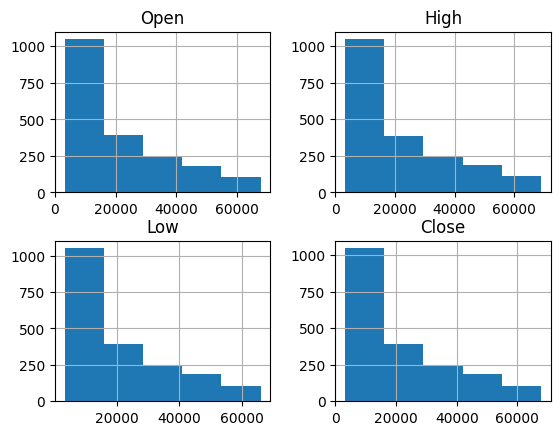

In [ ]:
# Visualization
df.hist(bins = 5)

<Axes: >

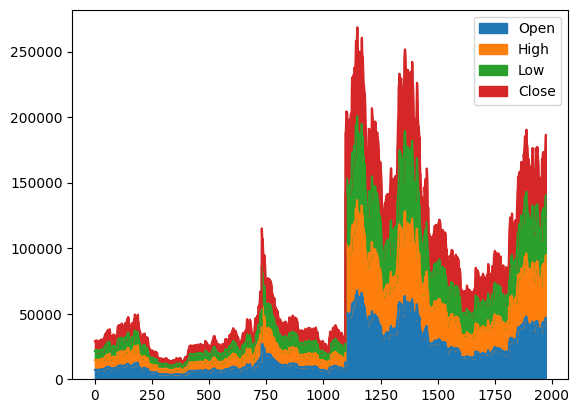

In [ ]:
df.plot.area()

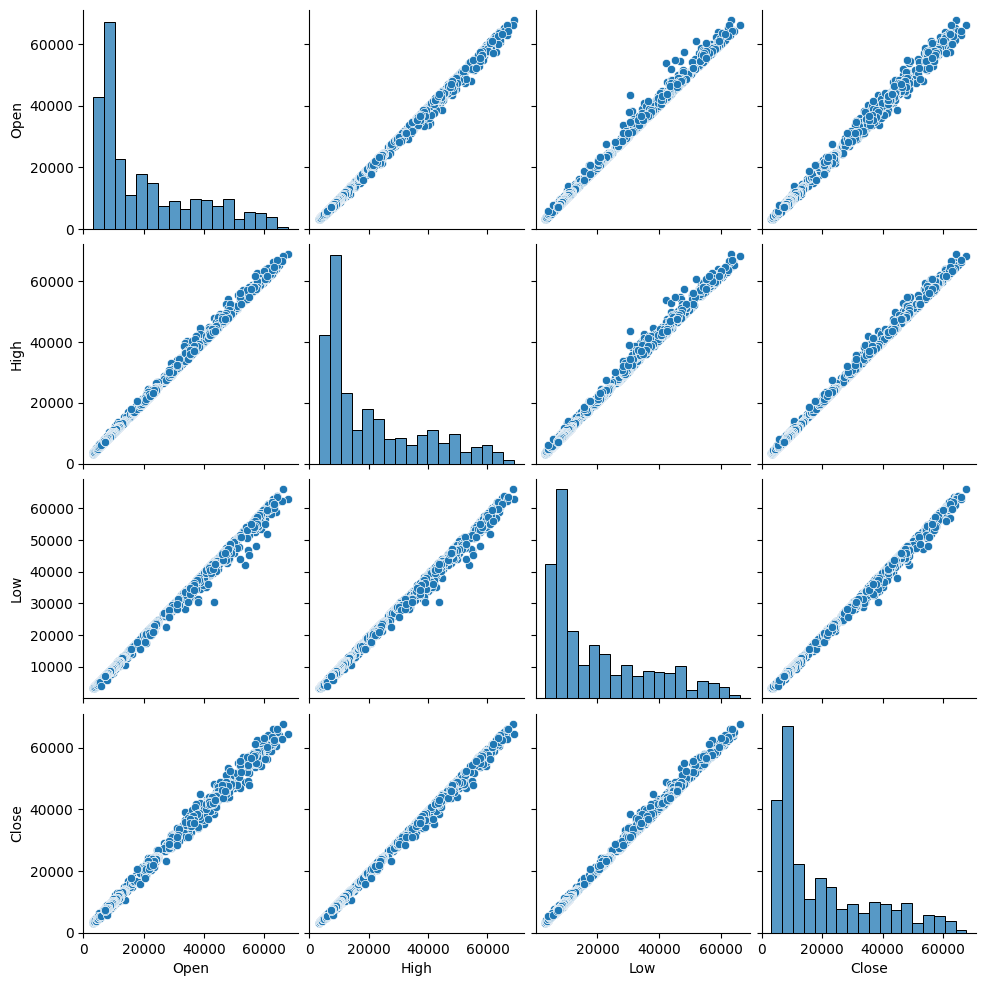

In [ ]:
sns.pairplot(df)

In [ ]:
# No categorical values

<Axes: >

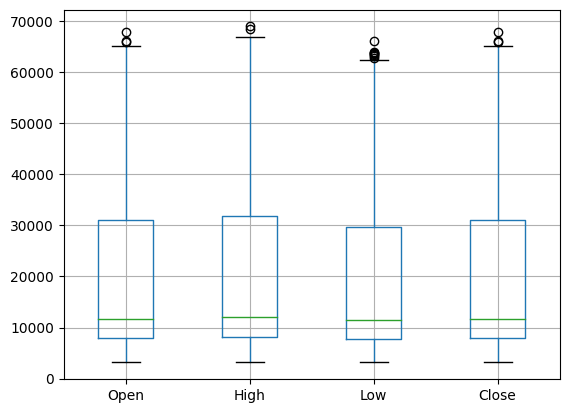

In [ ]:
df.boxplot()

## Заклучоци:
Биткоинот варира од 10000 до 30000 долари.
* Најниска вредност имал 3156 (тоа е минимумот од колоната low, тоа се гледа од функцијата min)
* Највисока вредност имал 68925 (тоа е максимумот од колоната high, тоа се гледа од функцијата max)

Помеѓу сите колони (open, close, low, high) има строга линеарна зависност - тоа се гледа од статистиките направени со визуелизација преку sns.pairplot функцијата. Зависноста има позитивен коефициент на корелација - како што расти вредноста на една променлива, расти вредноста на останатите променливи.